In [9]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits

In [2]:
t = Table.read('/Users/nityaravi/Documents/Research/RotationCurves/data/manga/output_files/DR17/CURRENT_MASTER_TABLE/Elliptical_sphdisk_refitspirals_BPT_illustris_v10.fits')

In [3]:
t[:5]

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag,nsa_elpetro_absmag,nsa_elpetro_amivar,nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction,nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux,nsa_petro_flux_ivar,nsa_elpetro_flux,nsa_elpetro_flux_ivar,nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux,nsa_sersic_flux_ivar,smoothness_score,nsa_elpetro_th90,v_sys,v_sys_err,ba,ba_err,x0,x0_err,y0,y0_err,phi,phi_err,v_max,v_max_err,r_turn,r_turn_err,chi2,alpha,alpha_err,Rmax,M,M_err,fit_flag,Sigma_disk,Sigma_disk_err,R_disk,R_disk_err,rho_bulge,rho_bulge_err,R_bulge,R_bulge_err,M90_disk,M90_disk_err,M_disk,M_disk_err,chi2_disk,WF50,WF50_err,DL_ttype,vis_tidal,b,b_err,M_R90,M_R90_err,fit_function,A_g,A_r,logH2,R90_kpc,v_3p5,v_3p5_err,NSA_plate,NSA_fiberID,NSA_MJD,logH2_CG,logH2_CG_err,logH2_M,Z,Z_err,M_Z,M_Z_err,grad_Z,grad_Z_err,Z_0,Z_0_err,SFR,sSFR,SFR_err,sSFR_err,Flux_OII_3726,Flux_OII_3726_Err,Flux_OII_3728,Flux_OII_3728_Err,Flux_OIII_4958,Flux_OIII_4958_Err,Flux_OIII_5006,Flux_OIII_5006_Err,Flux_NII_6547,Flux_NII_6547_Err,Flux_NII_6583,Flux_NII_6583_Err,Flux_Ha_6562,Flux_Ha_6562_Err,Flux_Hb_4861,Flux_Hb_4861_Err,CMD_class,rabsmag_NSA,param_H2,param_H2_err,Z_map,Z_err_map,M_Z_map,M_Z_err_map,logHI_R90,Mvir,Mvir_err,star_sigma,star_sigma_err,dipole_moment,Rgal,vflag_VF,nsa_elpetro_log_mass,rabsmag,param_H2_R90,logHe,sphd_rho_c,sphd_rho_c_err,sphd_R_scale,sphd_R_scale_err,sphd_Sigma_d,sphd_Sigma_d_err,sphd_R_d,sphd_R_d_err,sphd_M_star,sphd_M_star_err,sphd_chi2,mhq_R_scale,mhq_R_scale_err,mhq_M_star,mhq_M_star_err,mhq_gamma,mhq_gamma_err,mhq_chi2,hq_R_scale,hq_R_scale_err,hq_M_star,hq_M_star_err,hq_chi2,sph_rho_c,sph_rho_c_err,sph_R_scale,sph_R_scale_err,sph_M_star,sph_M_star_err,sph_chi2,sum_M_star,sum_M_star_err,BPT_class,spiral_mask,elliptical_mask,Age_LW_Re_fit,Age_MW_Re_fit,ZH_LW_Re_fit,ZH_MW_Re_fit,M90_disk_h,M90_disk_err_h,sphd_M_star_err_h,sphd_M_star_h,V_R90,V_R90_err,e_M_star_R90,e_M_star_R90_err,e_M_star_R90_h,e_M_star_R90_err_h,v_eff,v_eff_err,logHI,logHI_err,HI_catalog,logHI_h,logHI_err_h,N2Ha,O3Hb,nsa_u_r,illustris_match,illustris_dist,illustris_u_r,illustris_Mstar,illustris_Mstar_Sal,illustris_Vmax,illustris_flag,illustris_MR90,MH2_S14_vol,MHI_S14_vol,MHtot
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64[7],float64[7],float64[7],float64,float64,float64,float64,float64[7],float64,float64,float64[7],float64[7],float64[7],float64[7],float64,float64,float64,float64,float64[7],float64[7],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,

In [206]:
t[np.where(t['plateifu']=='8444-9101')[0]]['nsa_elpetro_phi']

0.0327454


In [207]:
cube_fn = '/Users/nityaravi/Documents/Research/RotationCurves/data/manga/DR17/8444/9101/manga-8444-9101-MAPS-HYB10-MILESHC-MASTARSSP.fits.gz'
cube = fits.open(cube_fn)
halpha_vel = cube['EMLINE_GVEL'].data[23]
halpha_gvel_mask = cube['EMLINE_GVEL_MASK'].data[23]
halpha_flux = cube['EMLINE_GFLUX'].data[23]
halpha_flux_ivar = cube['EMLINE_GFLUX_IVAR'].data[23]
flux = cube['SPX_MFLUX'].data
mx = np.max(flux)                                         #locating the peak value on the flux map 
indices = np.where(flux == mx) 
clean_coords = [int(indices[0][0]), int(indices[1][0])]
# clean_coords = [30,30]


halpha_mask = np.logical_or(halpha_gvel_mask, np.abs(halpha_flux*np.sqrt(halpha_flux_ivar)) < 5)         #masking halpha velocity map with default mask and 
mhalpha_vel = ma.array(halpha_vel, mask=halpha_mask)   

In [249]:
clean_coords

[32, 33]

In [214]:
np.where(t['plateifu']=='8444-9101')[0]

array([6513])

In [259]:
PA = t['nsa_elpetro_phi'][6513]

In [260]:
PA

0.0327454

In [261]:
np.tan(theta)

-57.289961630759144

In [262]:
theta

-1.5533430342749532

In [282]:
theta = np.radians(PA-90)   #theta is PA reoriented to the positive x axis for calculations
checkedPA = np.radians(PA)
f = 50

for x in range(int(clean_coords[0]/2),clean_coords[0]):
    print(x)
    if x < 0 or x >= mhalpha_vel.shape[0]:
        print('x out')
        continue
    
    y = clean_coords[1] - round((clean_coords[0] - x) * np.tan(theta)) #y's are found based on the slope given by PA
    print(y)

    
    if PA < 15 and PA > 0:
        x = clean_coords[0]
        y = clean_coords[1] - f
        while y < 0 or ma.is_masked(mhalpha_vel[x,y]):
            f -= 1
            y = clean_coords[1] - f
            print(y)


        print(x)
        print(y)
        
    if y < 0 or y >= mhalpha_vel.shape[1]:
        print('y out')
        continue
        
    if ma.is_masked(mhalpha_vel[x, y]):
        print('masked')
        continue
    
    else:
        if (mhalpha_vel[x,y]<0):
            print(x,y)
            print('bad_pa')
            checkedPA = (PA + 180) *(np.pi/180)
        else:
            print(x,y)
            print('good_pa')
            checkedPA = PA*(np.pi/180)
        break

16
28029
-16
-15
-14
-13
-12
-11
-10
-9
-8
-7
-6
-5
-4
-3
-2
-1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
32
23
32 23
good_pa


In [274]:
tan theta = x / y

SyntaxError: invalid syntax (268557846.py, line 1)

In [275]:
np.degrees(checkedPA)

0.0327454

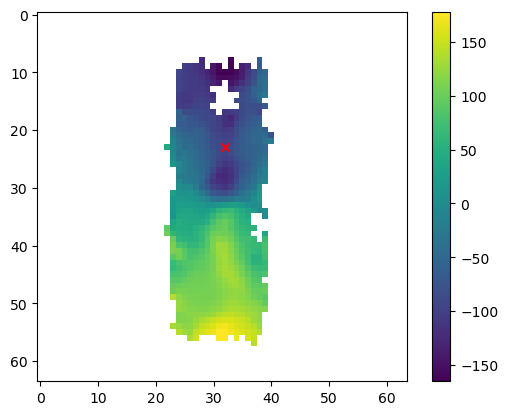

In [278]:
plt.imshow(mhalpha_vel)
plt.colorbar()
plt.scatter(32,23, marker='x', color='r')
# plt.gca().invert_yaxis()

In [111]:
mhalpha_vel[9,30]

masked

In [112]:
mhalpha_vel[30,9]

masked

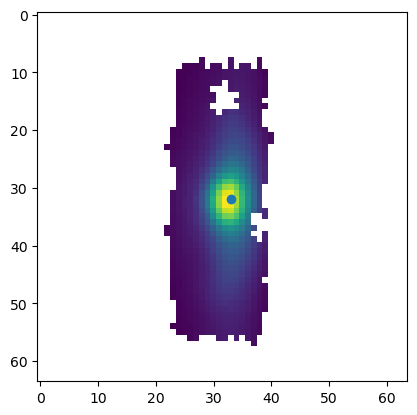

In [266]:
plt.imshow(ma.array(flux, mask=halpha_mask))
plt.scatter(clean_coords[1], clean_coords[0])

In [199]:
clean_coords

[15, 16]

In [114]:
indices

(array([15]), array([16]))

In [203]:
#old version:

theta = np.radians(PA-90)                      #theta is PA reoriented to the positive x axis for calculations
for x in range(15,clean_coords[0]):
    print(x)#goes 15 left to 15 right
    if x < 0 or x >= mhalpha_vel.shape[0]:
        print('x out')
        continue
            
    y = clean_coords[1]- round((clean_coords[0]-x) * np.tan(theta)) 
    print(y)#y's are found based on the slope given by PA
    if y < 0 or y >= mhalpha_vel.shape[1]:
        print('y out')
        continue
                
    if ma.is_masked(mhalpha_vel[x, y]):
        continue
        break
            
            
    if (mhalpha_vel[x,y]<0):                        # if velocity comes back negative the position angle will be flipped 180 deg, otherwise left alone
        checkedPA = (PA + 180) *(np.pi/180)
    else:
        checkedPA = PA*(np.pi/180)

In [202]:
checkedPA

4.350168583413543